# Лабораторная работа 2
**Задание:** 
<br>
Выполните предварительную обработку данных в файле <b>DataSet2.csv</b>, затем реализуйте основные техники EDA, сопровождая полученные данные соответствующими выводами.

# Инициализация проекта

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
data = pd.read_csv('DataSet2.csv')

## Исследование исходных данных

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

In [215]:
data.head()

,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98


## Получаем следующие выводы
1. В столбцах с 10 по 28 присутствуют пропущенные значения
2. Нужно убрать столбец 'Unnamed: 0'
3. 'Original Release Date' и 'Streaming Release Date' нужно привести в тип даты

## Столбцы с неподходящими типами данных
- 'Tomatometer Rating', 
- 'Tomatometer Count', 
- 'Audience Rating', 
- 'Audience Count',
- 'Tomatometer Top Critics Count',
- 'Tomatometer Fresh Critics Count',
- 'Tomatometer Rotten Critics Count'

Поменять в них значение с float64 на int64

In [216]:
data.describe()

,Unnamed: 0,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
count,571.000000,571.000000,571.000000,571.000000,439.000000,439.000000,439.000000,4.390000e+02,439.000000,439.000000,439.000000
mean,285.000000,1973.357268,124.894921,7.570403,87.503417,110.697039,82.428246,5.154145e+05,21.861048,98.471526,12.275626
std,164.977776,29.315738,26.322817,0.559652,11.690622,119.541406,10.927897,3.623107e+06,21.615492,107.798554,19.310232
min,0.000000,1927.000000,66.000000,5.600000,29.000000,5.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,84.000000,25.000000,78.000000,6.637500e+03,5.000000,21.500000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,91.000000,54.000000,85.000000,3.716600e+04,11.000000,49.000000,5.000000
75%,427.500000,2001.000000,136.500000,7.900000,95.000000,199.000000,90.000000,1.255365e+05,45.000000,163.500000,15.000000
max,570.000000,2021.000000,238.000000,9.300000,100.000000,574.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000


# Исправление типов данных

In [217]:
# удаляем лишний столбец
data = data.drop('Unnamed: 0', axis=1)

In [218]:
# заменяем тип данных столбцов с заполнением пропущенных значений
columns_change_type = [
    'Tomatometer Rating', 
    'Tomatometer Count', 
    'Audience Rating', 
    'Audience Count',
    'Tomatometer Top Critics Count',
    'Tomatometer Fresh Critics Count',
    'Tomatometer Rotten Critics Count'
    ]

for column in columns_change_type:
    data[column] = data[column].fillna(-100)
    data[column] = data[column].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Film                              571 non-null    object 
 1   Oscar Year                        571 non-null    object 
 2   Film Studio/Producer(s)           571 non-null    object 
 3   Award                             571 non-null    object 
 4   Year of Release                   571 non-null    int64  
 5   Movie Time                        571 non-null    int64  
 6   Movie Genre                       571 non-null    object 
 7   IMDB Rating                       571 non-null    float64
 8   IMDB Votes                        571 non-null    object 
 9   Movie Info                        438 non-null    object 
 10  Genres                            439 non-null    object 
 11  Critic Consensus                  339 non-null    object 
 12  Content 

In [219]:
# заменяем строки в столбце на даты
data['Original Release Date'] = pd.to_datetime(data['Original Release Date'], format='%Y-%m-%d')
data['Streaming Release Date'] = pd.to_datetime(data['Streaming Release Date'], format='%Y-%m-%d')
data[['Original Release Date','Streaming Release Date']].head()

,Original Release Date,Streaming Release Date
0,1927-08-12,2017-01-02
1,NaT,NaT
2,NaT,NaT
3,1929-02-01,2017-02-25
4,NaT,NaT


In [220]:
# смотрим в процентном соотношении количество неизвестных значений
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)[:10]

Critic Consensus          40.630473
Audience Status           23.642732
Authors                   23.467601
Directors                 23.467601
Streaming Release Date    23.292469
Movie Info                23.292469
Tomatometer Status        23.117338
Genres                    23.117338
Content Rating            23.117338
Actors                    23.117338
dtype: float64

# EDA

array([[<Axes: title={'center': 'Year of Release'}>,
        <Axes: title={'center': 'Movie Time'}>,
        <Axes: title={'center': 'IMDB Rating'}>],
       [<Axes: title={'center': 'Original Release Date'}>,
        <Axes: title={'center': 'Streaming Release Date'}>,
        <Axes: title={'center': 'Tomatometer Rating'}>],
       [<Axes: title={'center': 'Tomatometer Count'}>,
        <Axes: title={'center': 'Audience Rating'}>,
        <Axes: title={'center': 'Audience Count'}>],
       [<Axes: title={'center': 'Tomatometer Top Critics Count'}>,
        <Axes: title={'center': 'Tomatometer Fresh Critics Count'}>,
        <Axes: title={'center': 'Tomatometer Rotten Critics Count'}>]],
      dtype=object)

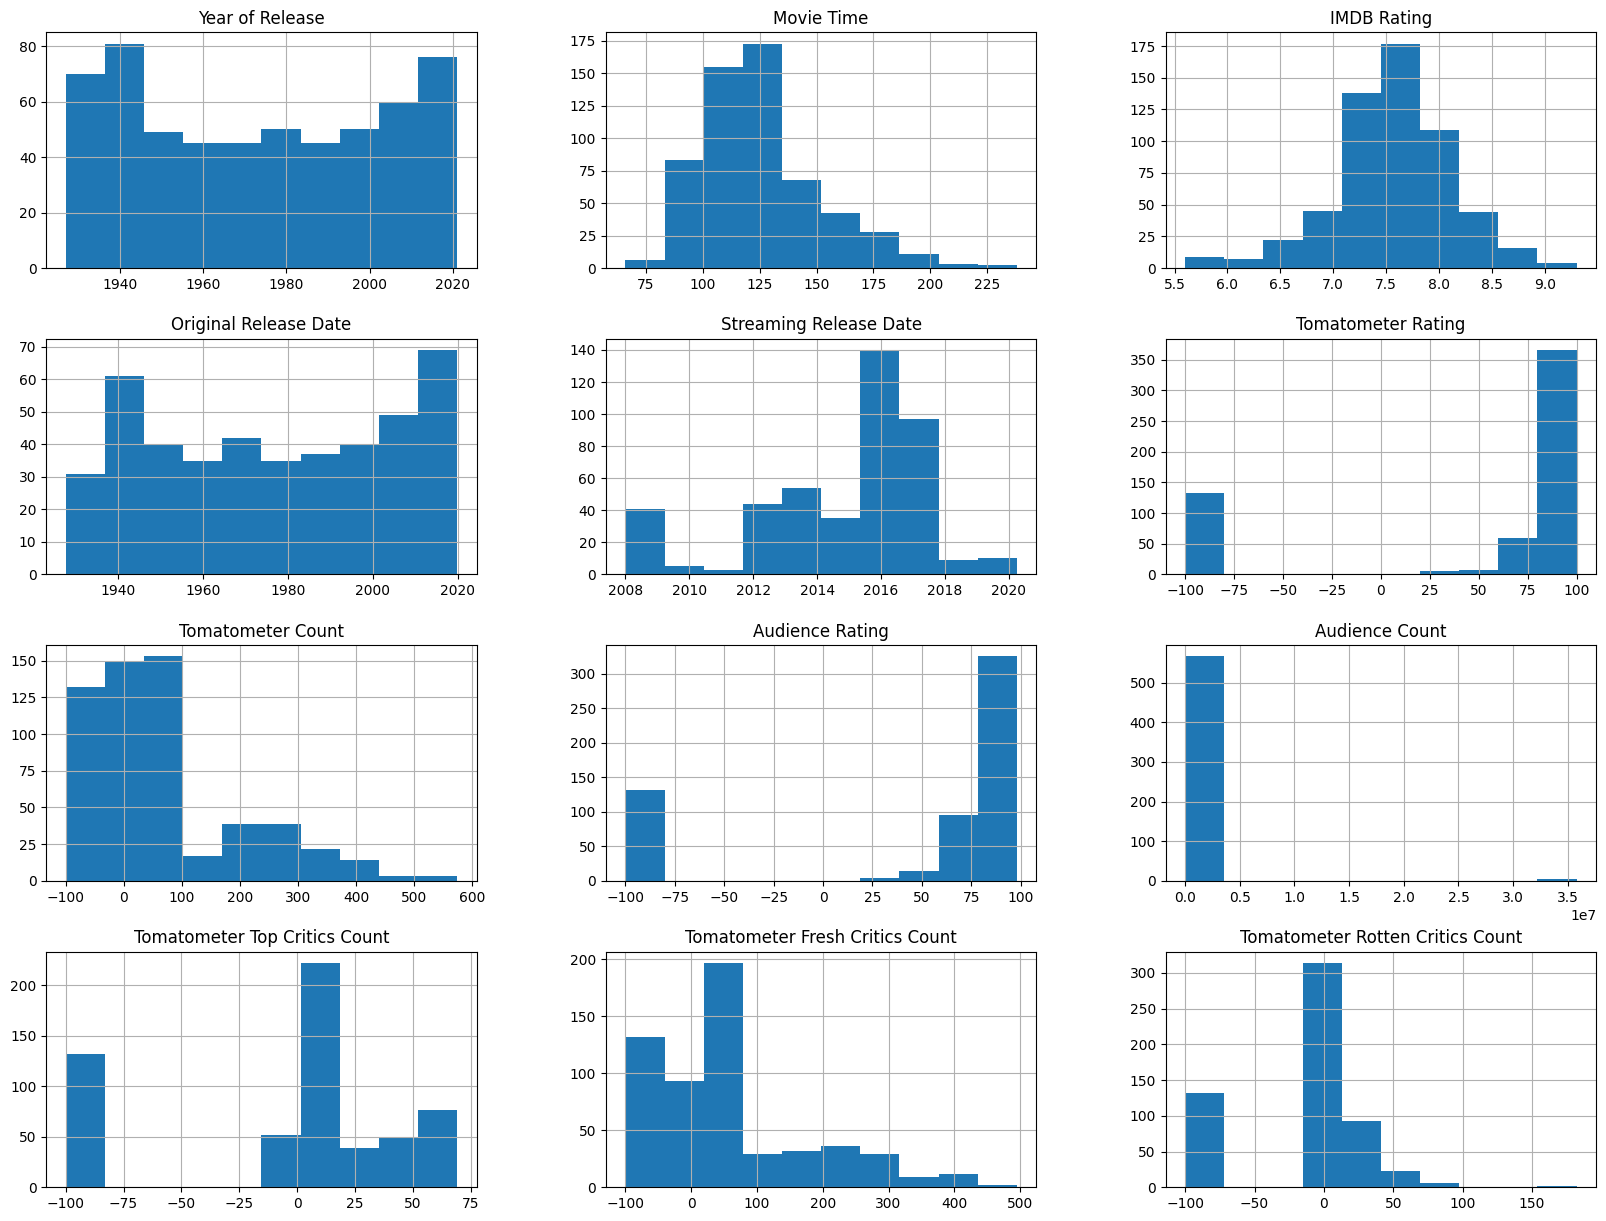

In [221]:
# колонки, состоящие из числовых значений
numeric_columns = data.describe().columns

view_data = data[numeric_columns]
view_data.hist(figsize=(20,15))

## Избавление от выбросов

In [222]:
# составим dataframe, состоящий из столбцов, содержащих только числовые значения
outlier = data[numeric_columns]
outlier.head()

,Year of Release,Movie Time,IMDB Rating,Original Release Date,Streaming Release Date,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,1927,144,7.5,1927-08-12,2017-01-02,93,46,78,3530,9,43,3
1,1927,110,7.7,NaT,NaT,-100,-100,-100,-100,-100,-100,-100
2,1928,84,6.7,NaT,NaT,-100,-100,-100,-100,-100,-100,-100
3,1929,100,5.7,1929-02-01,2017-02-25,33,24,21,1813,7,8,16
4,1929,91,5.8,NaT,NaT,-100,-100,-100,-100,-100,-100,-100


In [223]:
Q1 = outlier.quantile(0.25)
Q1

Year of Release                                  1944.0
Movie Time                                        107.0
IMDB Rating                                         7.3
Original Release Date               1950-09-29 00:00:00
Streaming Release Date              2013-08-01 00:00:00
Tomatometer Rating                                 57.5
Tomatometer Count                                   7.0
Audience Rating                                    53.0
Audience Count                                    483.0
Tomatometer Top Critics Count                       0.0
Tomatometer Fresh Critics Count                     6.0
Tomatometer Rotten Critics Count                    0.0
Name: 0.25, dtype: object

In [224]:
Q3 = outlier.quantile(0.75)
Q3

Year of Release                                  2001.0
Movie Time                                        136.5
IMDB Rating                                         7.9
Original Release Date               2002-12-27 00:00:00
Streaming Release Date              2016-08-10 00:00:00
Tomatometer Rating                                 94.0
Tomatometer Count                                  95.5
Audience Rating                                    88.0
Audience Count                                  70090.0
Tomatometer Top Critics Count                      26.0
Tomatometer Fresh Critics Count                    88.0
Tomatometer Rotten Critics Count                   10.5
Name: 0.75, dtype: object

In [225]:
IQR = Q3 - Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered.head()

,Year of Release,Movie Time,IMDB Rating,Original Release Date,Streaming Release Date,Tomatometer Rating,Tomatometer Count,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count
0,1927,144,7.5,1927-08-12,2017-01-02,93,46,78,3530,9,43,3
9,1930,87,7.1,1930-05-14,2012-04-16,75,8,69,323,0,6,2
18,1932,112,7.4,1932-01-01,2016-12-20,86,42,77,7014,10,36,6
21,1931,86,7.3,1931-11-21,2017-01-04,90,10,74,617,2,9,1
27,1933,89,7.4,1933-03-09,2012-04-16,96,25,74,7561,4,24,1


In [226]:
# Копирование индексов
index_list = list(data_filtered.index.values)

# Будем хранить данные без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221","With World War I afoot, David Armstrong (Richa...",...,Certified-Fresh,93,46,Upright,78,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079","After being convicted of manslaughter, drunk d...",...,Fresh,75,8,Upright,69,323,0,6,2,297aa285-29d7-4a22-b833-c5632ab3e562
18,Grand Hotel,1931/32,Metro-Goldwyn-Mayer,Winner,1932,112,"Drama,Romance",7.4,"18,314","At a luxurious Berlin hotel between the wars, ...",...,Certified-Fresh,86,42,Upright,77,7014,10,36,6,be69f946-6adc-47e4-8491-79d6c033f59d
21,The Champ,1931/32,Metro-Goldwyn-Mayer,Nominee,1931,86,"Drama,Sport",7.3,"3,003",Champ (Wallace Beery) is a down-on-his-luck bo...,...,Fresh,90,10,Upright,74,617,2,9,1,c8994348-093e-4e22-8ffe-6ad3332a2bab
27,42nd Street,1932/33,Warner Bros.,Nominee,1933,89,"Comedy,Drama,Musical",7.4,"11,342",When revered Broadway director Julian Marsh (W...,...,Fresh,96,25,Upright,74,7561,4,24,1,1ad59370-1ed5-4d3a-a8c4-8571f95da168


array([[<Axes: title={'center': 'Year of Release'}>,
        <Axes: title={'center': 'Movie Time'}>,
        <Axes: title={'center': 'IMDB Rating'}>],
       [<Axes: title={'center': 'Original Release Date'}>,
        <Axes: title={'center': 'Streaming Release Date'}>,
        <Axes: title={'center': 'Tomatometer Rating'}>],
       [<Axes: title={'center': 'Tomatometer Count'}>,
        <Axes: title={'center': 'Audience Rating'}>,
        <Axes: title={'center': 'Audience Count'}>],
       [<Axes: title={'center': 'Tomatometer Top Critics Count'}>,
        <Axes: title={'center': 'Tomatometer Fresh Critics Count'}>,
        <Axes: title={'center': 'Tomatometer Rotten Critics Count'}>]],
      dtype=object)

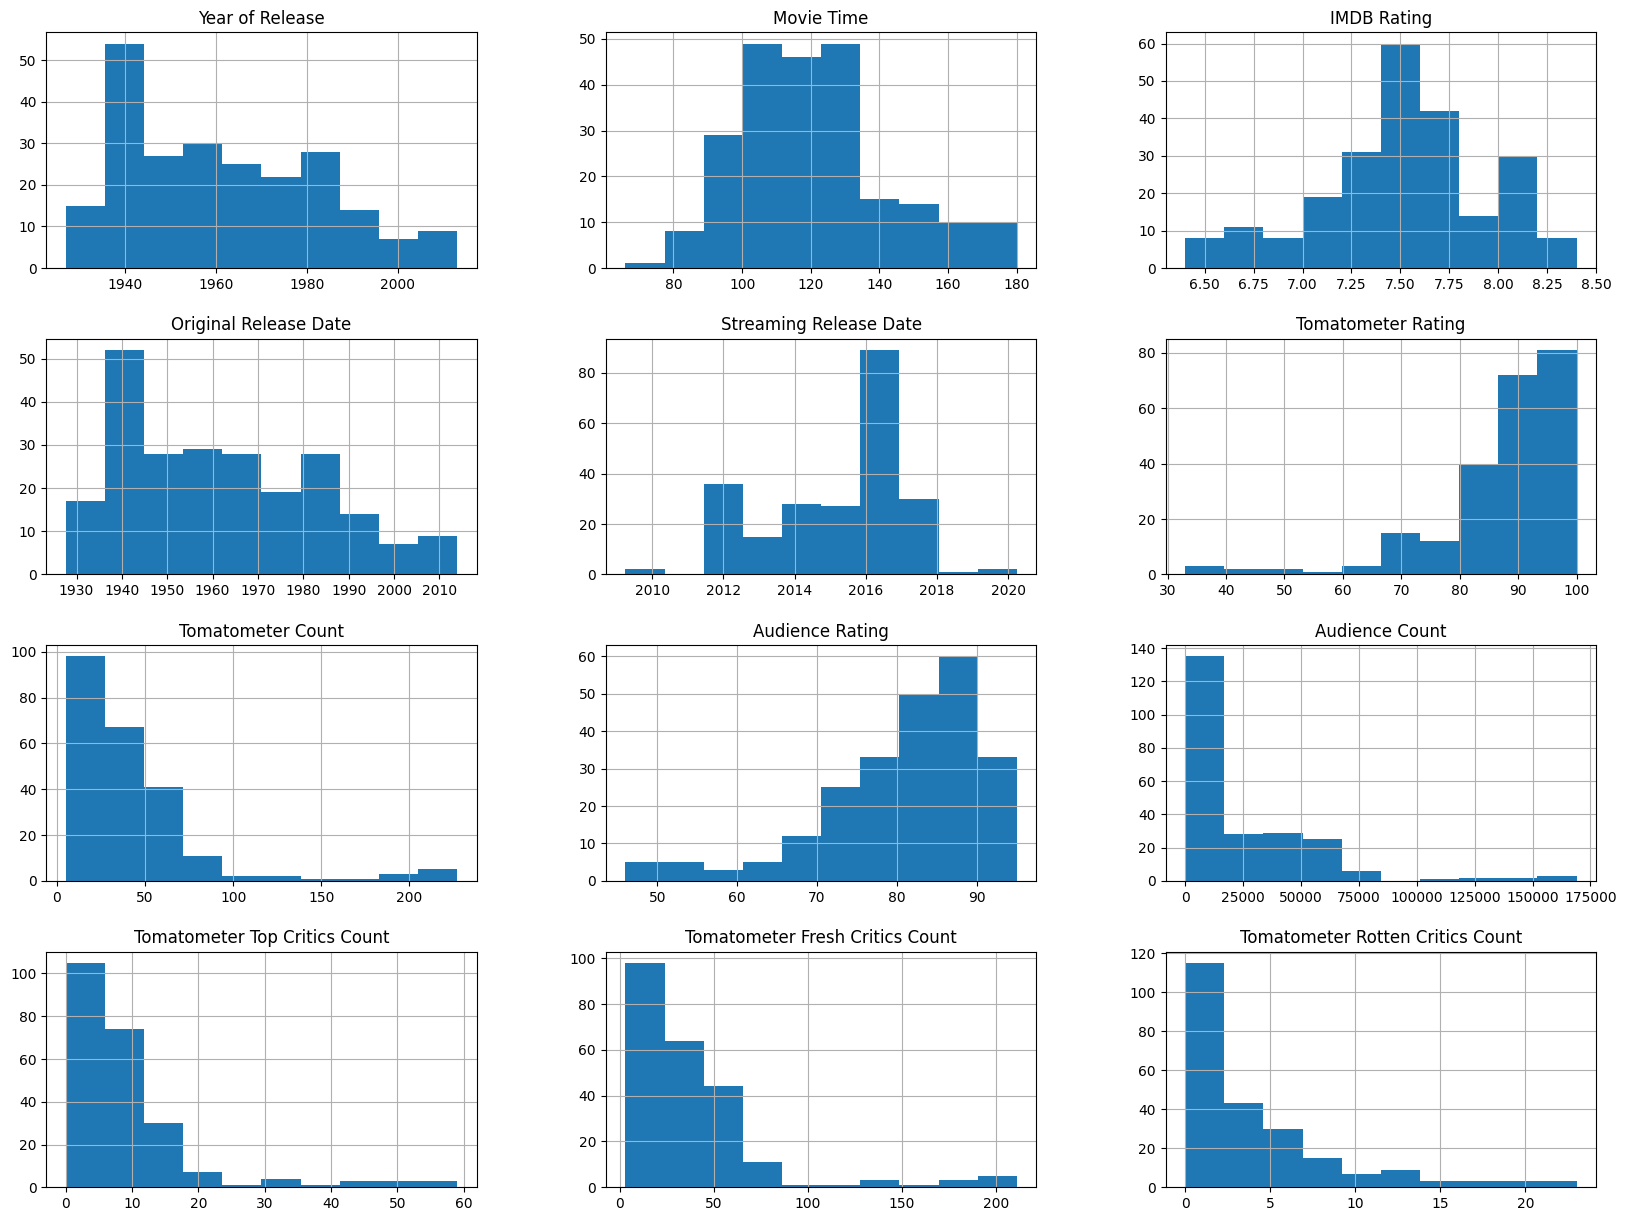

In [227]:
filtered_outlier = data_filtered[numeric_columns]
data_filtered.hist(figsize=(20,15))

### Заключение
- Определили нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. Затем нашли межквартильный размах. Использовали эту информацию для фильтрации выбросов. После удаления выбросов некоторые графики выглядят более симметричными по сравнению с выбросами, и в данных легче наблюдать среднее значение, медиану и моду.

## Изучение основных параметров без выбросов

In [228]:
def compare_data(old_df, new_df, column, figsize: tuple[float,float] = (10,5), bins: int = 20):
    columns_to_view = {
        f'{column} (before)': old_df[column],
        f'{column} (after)': new_df[column]
    }
    view_data = pd.DataFrame(columns_to_view)
    view_data.hist(figsize=figsize, bins=bins)

### Сравнение года выпуска фильма

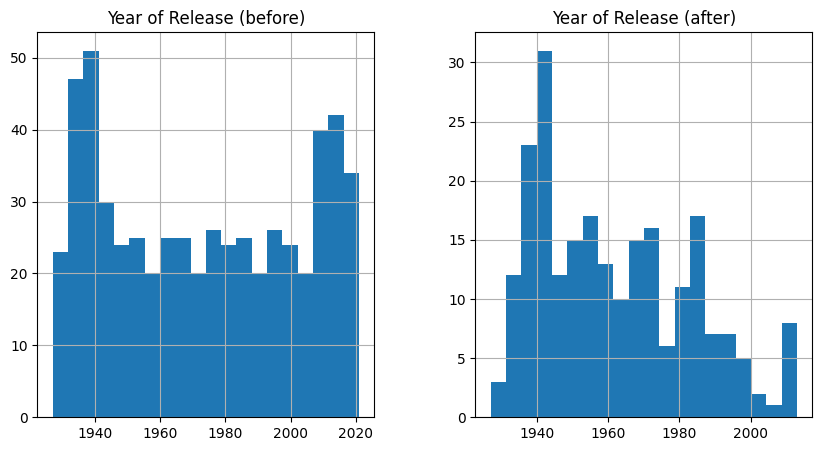

In [229]:
compare_data(data, data_filtered, 'Year of Release')

#### Заключение
- почти не изменились границы значений
- мода не изменилась, но осталась слева от середины графика
- сохранились перепады в значениях

### Сравнение длительности фильмов

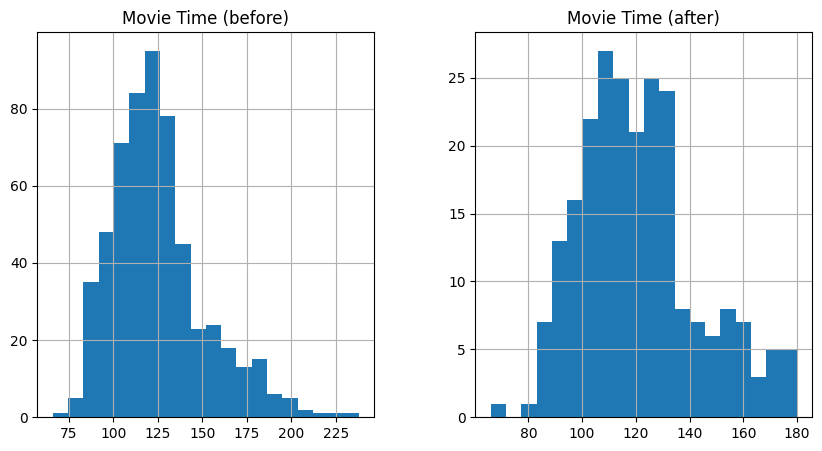

In [230]:
compare_data(data, data_filtered, 'Movie Time')

#### Заключение

- максимальная длительность фильмов была уменьшена с 225 мин до 180
- Гистограмма была сдвинута влево, но после удаления выбросов выровнилась, став более похожей на нормальное распределение

### Сравнение IMBD рейтинга

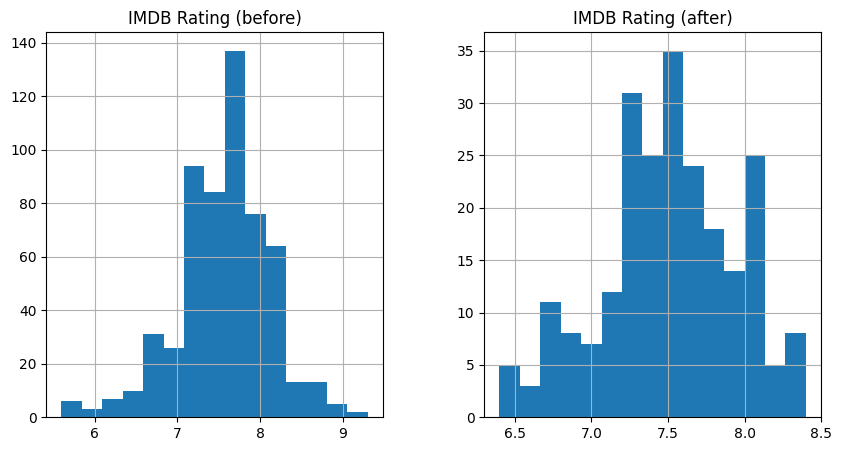

In [231]:
compare_data(data, data_filtered, 'IMDB Rating', bins=15)

#### Заключение

- сократились пределы оценки с [5.7 , 9.7] до [6.3 , 8.4]
- график близок к нормальному распределению, но мешает большое количество фильмов с оценкой 8

### Сравнение показателей Томатометра

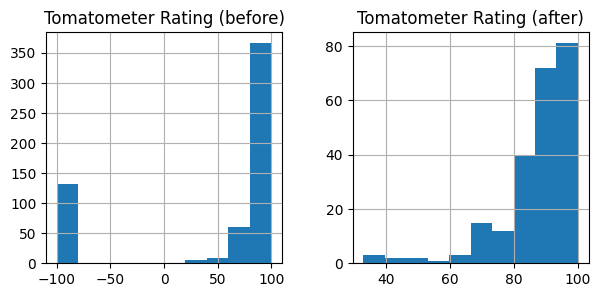

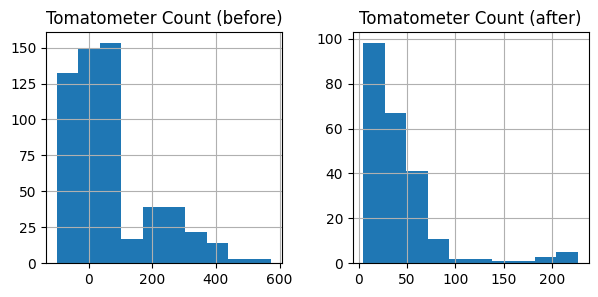

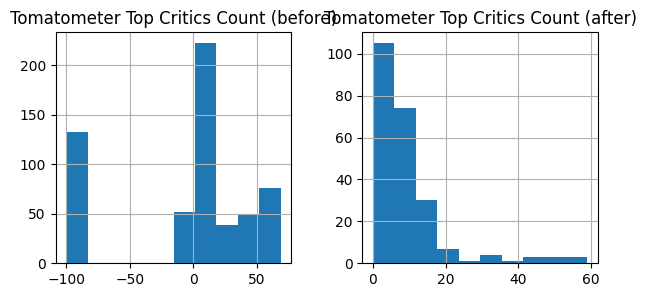

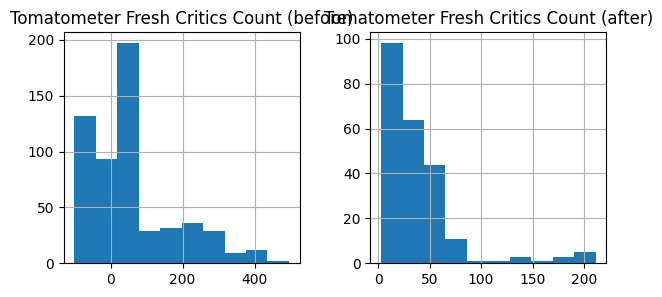

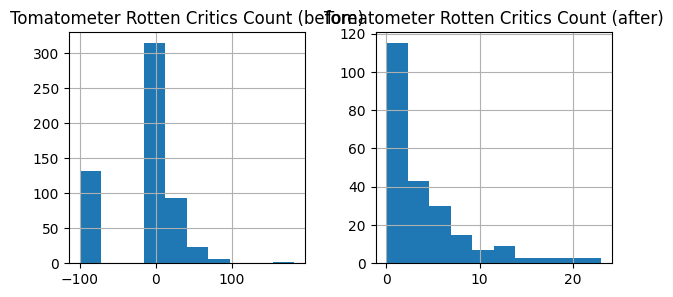

In [232]:
compare_columns = ['Tomatometer Rating',
                   'Tomatometer Count',
                   'Tomatometer Top Critics Count',
                   'Tomatometer Fresh Critics Count',
                   'Tomatometer Rotten Critics Count']

for column in compare_columns:
    compare_data(data, data_filtered, column, figsize=(7,3), bins=10)

#### Заключение

- 'Tomatometer Rating:
    * убрались несуществующие значения -100
    * существенно уменьшилось число фильмов с рейтингом от 90 до 100
    * мода до сих пор находится справа от центра графика

- 'Tomatometer Count':
    * убрались несуществующие значения -100
    * убрались значения с 230 до 580
    * стало меньше фильмов со значением от 0 до 50 и стал более виден переход к этим значениям

- 'Tomatometer Critics count':
    * уменьшился разброс значений не от 0 до 70, а от 0 до 60
    * убралось много фильмов со значением от 30 до 50

- 'Tomatometer Fresh Critics count':
    * график аналогичен графику 'Tomatometer Count' и потерпел схожие изменения

- 'Tomatometer Rotten critics count':
    * Существенно уменьшился разброс с 0-80 до 0-23
    
- Во всех графиках до выбросов и после преобладают нулевые значения

### Сравнение рейтинга Audience

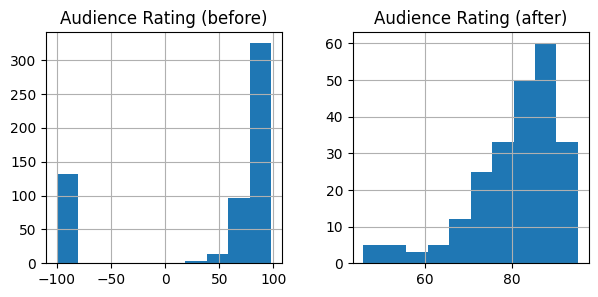

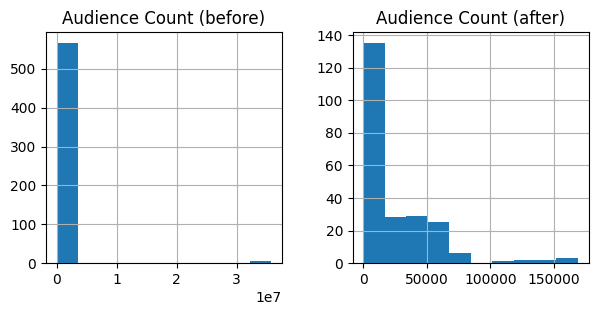

In [233]:
columns = ['Audience Rating',
           'Audience Count']

for column in columns:
    compare_data(data, data_filtered, column, figsize=(7,3), bins=10)

#### Заключение

- 'Audience Rating':
    * удалились лишние значения -100
    * мода и медиана до сих пор находятся правее центра

- 'Audience Count':
    * подавляющее количество нулевых значений снизилось, но осталось в большинстве
    * чётче видны значения от 20 до 80 тысяч

### Сравнение Streaming Release Date

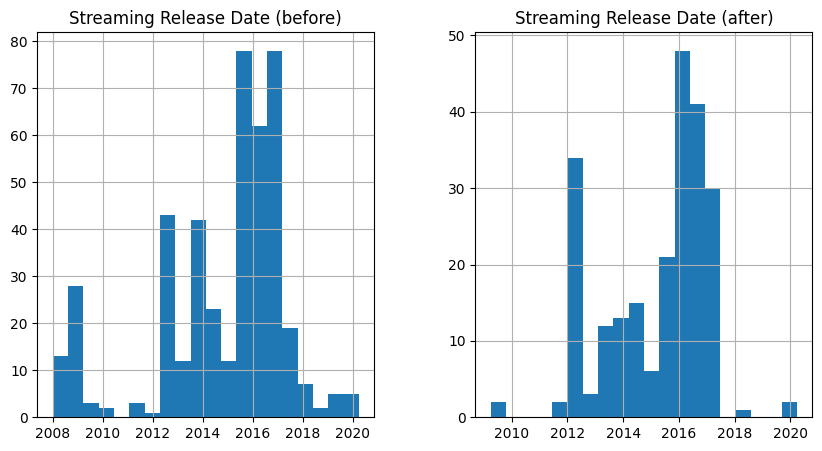

In [234]:
compare_data(data, data_filtered, 'Streaming Release Date', figsize=(10,5))

#### Заключение
- с 2010 по 2011 теперь отсутствуют фильмы
- убраны фильмы, сделанные с 2008 по 2010
- сгладился спад выпуска фильмов с 2014 по 2016

# Зависимости

Рейтинги фильмов могут зависить от:
1. года выпуска
2. длительности фильма
3. стриминговой даты выпуска

In [235]:
# функция для проверки зависимости рейтингов от параметра
def correlation(df,parametr,ratings):
    for rating in ratings:
        sns.lmplot(x=rating,y=parametr,data=df)
        plt.title(f'Зависимость {rating} от {parametr}')

    for rating in ratings:
        parametr_and_rating = df[[parametr,rating]]
        corr = parametr_and_rating.corr()
        print(round(corr,3))
        print()

## Зависимость от года выпуска

                    Year of Release  Tomatometer Rating
Year of Release               1.000              -0.036
Tomatometer Rating           -0.036               1.000

                 Year of Release  Audience Rating
Year of Release            1.000            0.172
Audience Rating            0.172            1.000

                 Year of Release  IMDB Rating
Year of Release            1.000       -0.003
IMDB Rating               -0.003        1.000



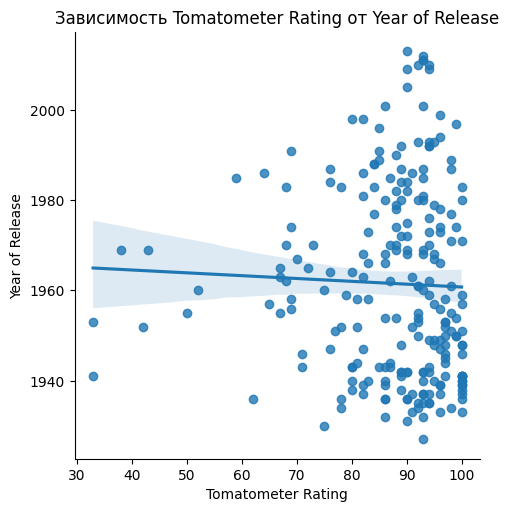

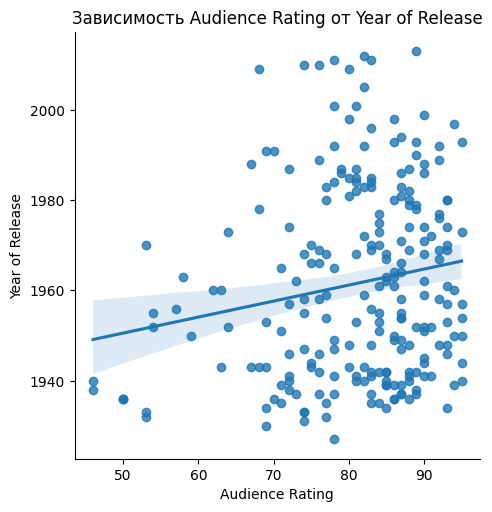

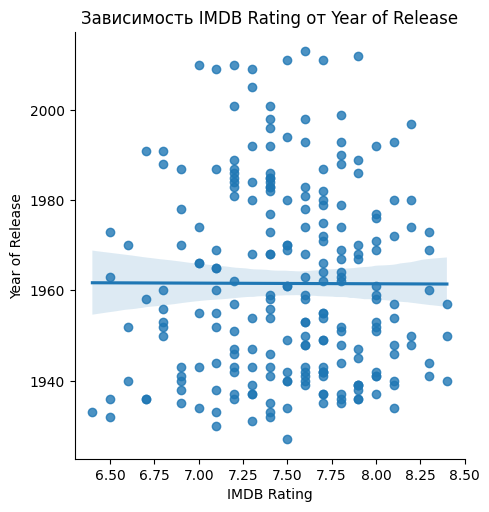

In [236]:
ratings = ['Tomatometer Rating',
           'Audience Rating',
           'IMDB Rating']
correlation(df=data_filtered,parametr='Year of Release',ratings=ratings)

### Заключение
Рейтинг слабо зависит от года выпуска.
Tomatometer и IMDB немного в обратной пропорциональности, а Audience рейтинг в прямой пропорциональности и сильнее

## Зависимость от длительности фильма

                    Movie Time  Tomatometer Rating
Movie Time               1.000              -0.281
Tomatometer Rating      -0.281               1.000

                 Movie Time  Audience Rating
Movie Time            1.000            0.059
Audience Rating       0.059            1.000

             Movie Time  IMDB Rating
Movie Time        1.000        0.049
IMDB Rating       0.049        1.000



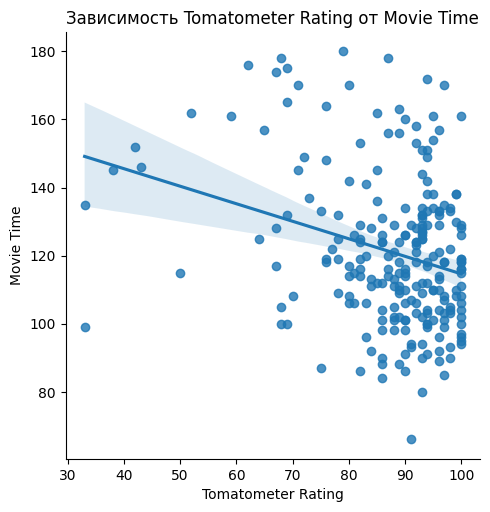

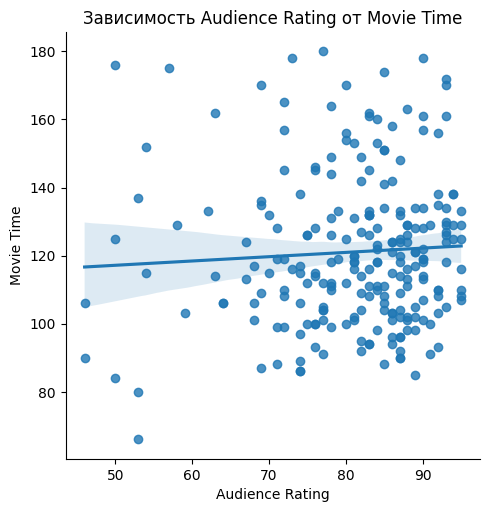

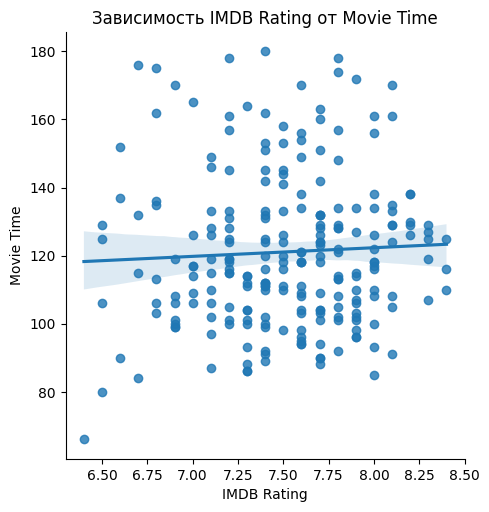

In [237]:
correlation(df=data_filtered,parametr='Movie Time',ratings=ratings)

### Заключение
Tomatometer rating неплохо так зависит от длительности фильма: чем ченьше длительность, тем больше рейтинг.
Audience и IMBD рейтинги почти не зависят от длительности

## Зависимость от стриминговой даты выпуска 

C:\Users\Azerty\AppData\Local\Temp\ipykernel_9676\472424186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Streaming Release Date'] = data_filtered['Streaming Release Date'].dt.year


                        Streaming Release Date  Tomatometer Rating
Streaming Release Date                   1.000               0.042
Tomatometer Rating                       0.042               1.000

                        Streaming Release Date  Audience Rating
Streaming Release Date                    1.00            -0.01
Audience Rating                          -0.01             1.00

                        Streaming Release Date  IMDB Rating
Streaming Release Date                   1.000        0.025
IMDB Rating                              0.025        1.000



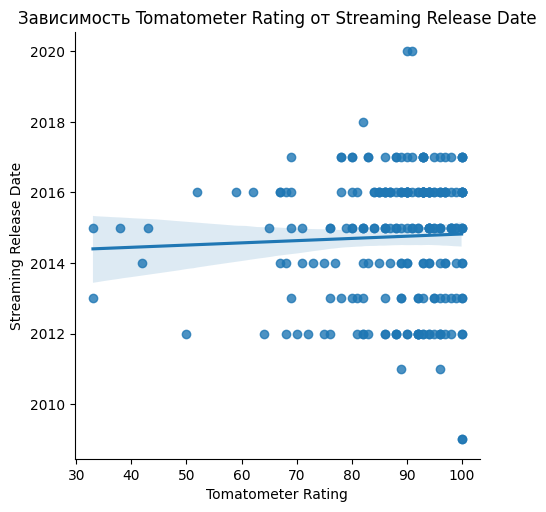

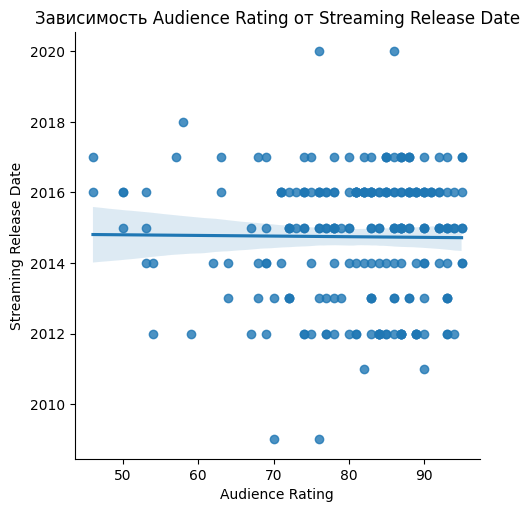

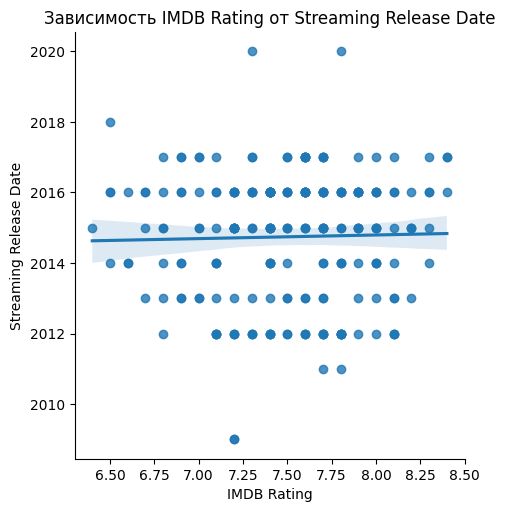

In [238]:
data_filtered['Streaming Release Date'] = data_filtered['Streaming Release Date'].dt.year
correlation(data_filtered,'Streaming Release Date',ratings)

### Заключение
От года выпуска на стриминговых сервисах рейтинги никак не зависят

## Категориальные данные

### Зависимость рейтингов от Tomatometer Status

<Axes: title={'center': 'Tomatometer Rating'}, xlabel='Tomatometer Status'>

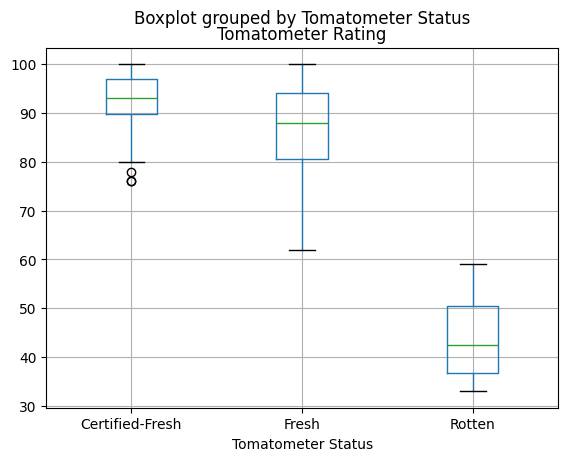

In [240]:
data_filtered.boxplot(by='Tomatometer Status',column='Tomatometer Rating')

<Axes: title={'center': 'Audience Rating'}, xlabel='Tomatometer Status'>

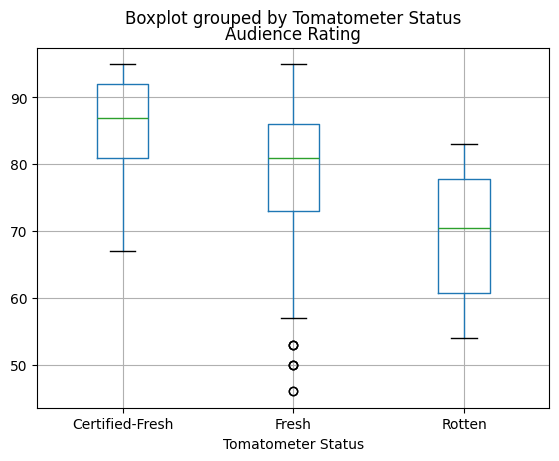

In [241]:
data_filtered.boxplot(by='Tomatometer Status',column='Audience Rating')

<Axes: title={'center': 'IMDB Rating'}, xlabel='Tomatometer Status'>

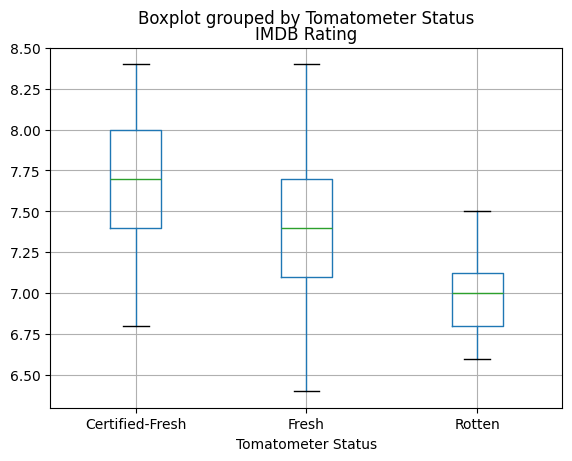

In [242]:
data_filtered.boxplot(by='Tomatometer Status',column='IMDB Rating')

#### Заключение
Все три рейтинга: Tomatometer, Audience, IMDB зависят от Tomatometer Status в прямой пропорциональности.
Фильмы со статусом 'Certified-Fresh' имеют выше рейтинг, чем статус 'Fresh', а фильмы со статусом 'Rotten' имеют самую низкую оценку 

### Зависимость рейтингов от Audience Status

<Axes: title={'center': 'Tomatometer Rating'}, xlabel='Audience Status'>

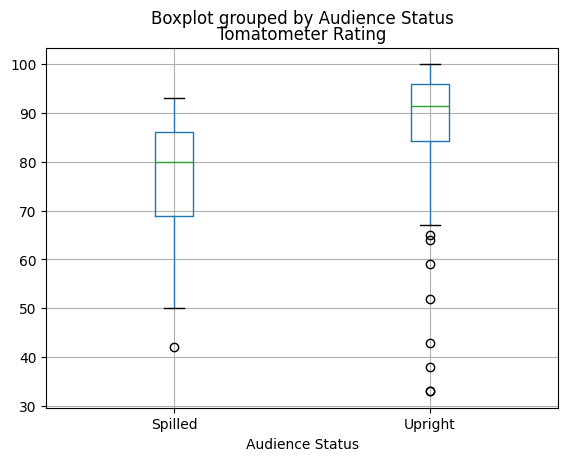

In [243]:
data_filtered.boxplot(by='Audience Status',column='Tomatometer Rating')

<Axes: title={'center': 'Audience Rating'}, xlabel='Audience Status'>

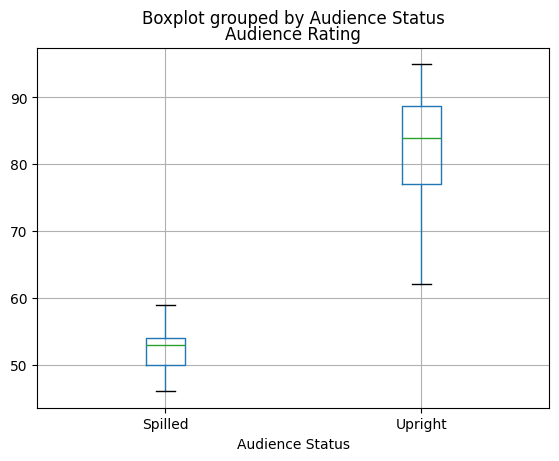

In [244]:
data_filtered.boxplot(by='Audience Status',column='Audience Rating')

<Axes: title={'center': 'IMDB Rating'}, xlabel='Audience Status'>

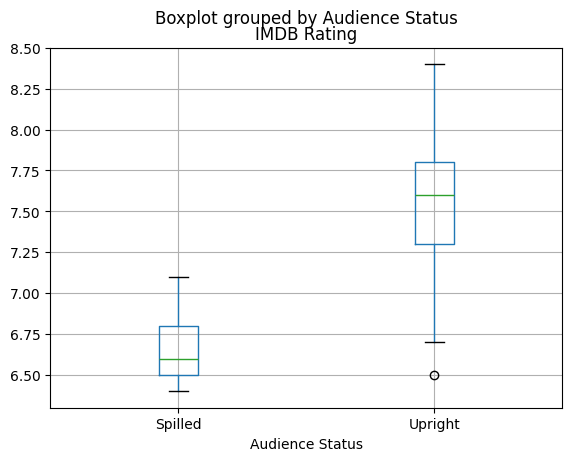

In [245]:
data_filtered.boxplot(by='Audience Status',column='IMDB Rating')

#### Заключение
Все три рейтинга зависят от Audience Status. Если статус фильма Upright (2), то рейтинг будет выше, чем фильм со статусом 'Spilled' (1), причём возможно в несколько раз

### Зависимость рейтингов от Award

<Axes: title={'center': 'Tomatometer Rating'}, xlabel='Award'>

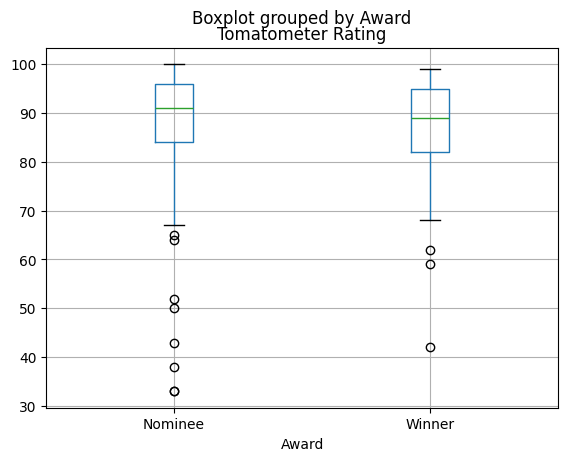

In [246]:
data_filtered.boxplot(by='Award',column='Tomatometer Rating')

<Axes: title={'center': 'Audience Rating'}, xlabel='Award'>

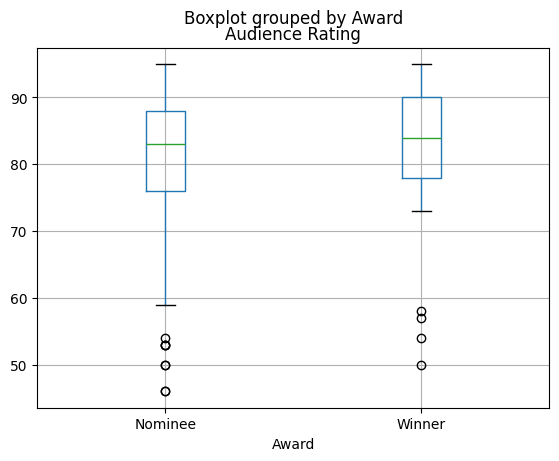

In [247]:
data_filtered.boxplot(by='Award',column='Audience Rating')

<Axes: title={'center': 'IMDB Rating'}, xlabel='Award'>

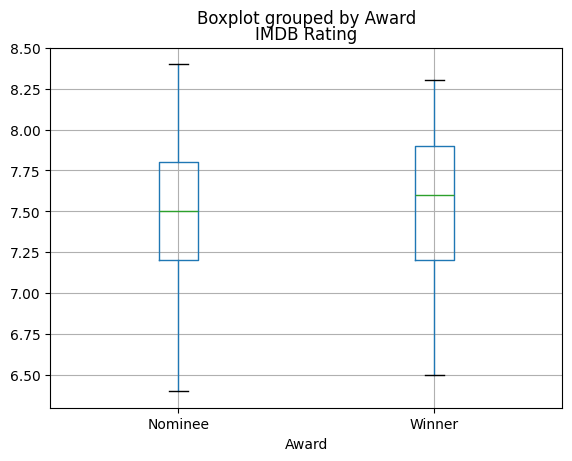

In [248]:
data_filtered.boxplot(by='Award',column='IMDB Rating')

#### Заключение
Как можно видеть из графиков, рейтинг почти не зависит от того, получил ли фильм оскар или был просто номинирован

### Зависимость рейтингов от Сontent rating

<Axes: title={'center': 'Tomatometer Rating'}, xlabel='Content Rating'>

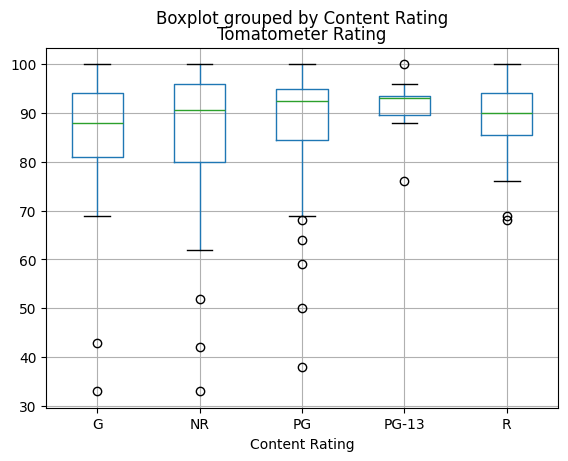

In [249]:
data_filtered.boxplot(by='Content Rating',column='Tomatometer Rating')

<Axes: title={'center': 'Audience Rating'}, xlabel='Content Rating'>

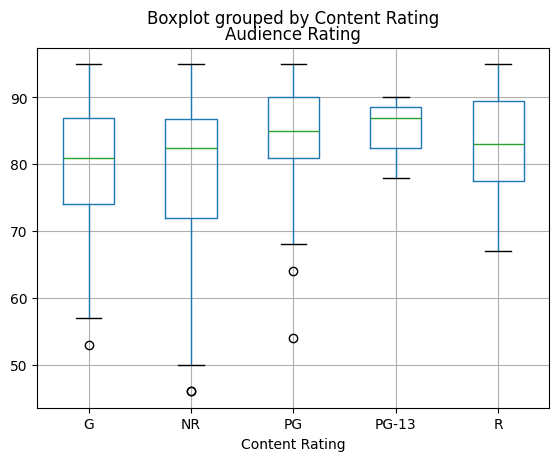

In [250]:
data_filtered.boxplot(by='Content Rating',column='Audience Rating')

<Axes: title={'center': 'IMDB Rating'}, xlabel='Content Rating'>

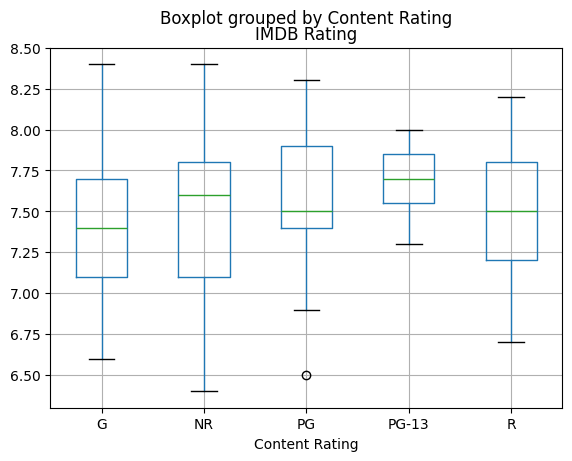

In [251]:
data_filtered.boxplot(by='Content Rating',column='IMDB Rating')

#### Заключение
Рейтинги зависят от возрастного рейтинга, но не сильно
- В Tomatometer Rating все возрастные категории почти наравне
- В Audience Rating наивысшую оценку имеют фильмы с категорией 'PG' и 'R'
- В IMDB Rating категория 'PG' также в лидерах по рейтингу

# Общий вывод

В лабораторной работе 2 было сделано следующее:

1. Обработка данных
- Найдены и исправлены типы данных на нужные и удалены ненужные столбцы

2. EDA
- Найдены столбцы, содержащие выбросы
- Удалены выбросы при помощи оценки IQR
- Анализированны данные до и после выбросов

3. Корреляция данных
- Исследована зависимость рейтингов Tomatometer, Audience и IMDB от года выпуска, длительности фильма и от года выхода на стриминговых сервисах:
    * Рейтинг слабо зависит от года выпуска. Tomatometer и IMDB немного в обратной пропорциональности, а Audience рейтинг в прямой пропорциональности и сильнее
    * Tomatometer rating неплохо так зависит от длительности фильма: чем ченьше длительность, тем больше рейтинг. Audience и IMBD рейтинги почти не зависят от длительности
    * От года выпуска на стриминговых сервисах рейтинги никак не зависят

- Исследована зависимость рейтингов от категориальных данных:
    * Все три рейтинга: Tomatometer, Audience, IMDB зависят от Tomatometer Status в прямой пропорциональности.Фильмы со статусом 'Certified-Fresh' имеют выше рейтинг, чем статус 'Fresh', а фильмы со статусом 'Rotten' имеют самую низкую оценку 
    * Все три рейтинга зависят от Audience Status. Если статус фильма Upright (2), то рейтинг будет выше, чем фильм со статусом 'Spilled' (1), причём возможно в несколько раз
    * Рейтинг почти не зависит от того, получил ли фильм оскар или был просто номинирован
    * Рейтинги зависят от возрастного рейтинга, но не сильно
        - В Tomatometer Rating все возрастные категории почти наравне
        - В Audience Rating наивысшую оценку имеют фильмы с категорией 'PG' и 'R'
        - В IMDB Rating категория 'PG' также в лидерах по рейтингу